# Phillies Batting and Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt


FIELDS = ['Year', 'Name', 'Position', 'Batting_Average', 'Slugging_Percentage']
YEARS = [1980, 1993, 2008, 2023]

phillies = pd.read_csv("PHL_batting.csv")

# New dataset includes only years in YEARS array and only everyday position players.
phillies = phillies[(phillies['Year'].isin(YEARS)) & (~phillies['Position'].fillna("").str.contains("P"))].loc[:, FIELDS]
phillies[phillies['Year'] == 1993].sort_values(by=["Batting_Average", "Slugging_Percentage"], ascending=False)

,Year,Name,Position,Batting_Average,Slugging_Percentage
1403,1993,Doug Lindsey,C,0.500,0.500
1399,1993,Rubén Amaro,OF,0.333,0.521
1387,1993,Kevin Stocker,SS,0.324,0.417
1391,1993,Jim Eisenreich,RF,0.318,0.445
1385,1993,John Kruk,1B,0.316,0.475
1390,1993,Lenny Dykstra,CF,0.305,0.482
1395,1993,Ricky Jordan,1B,0.289,0.421
1397,1993,Todd Pratt,C,0.287,0.529
1394,1993,Wes Chamberlain,RF,0.282,0.493
1396,1993,Kim Batiste,IF,0.282,0.436


The `~` operator is not a Pandas operator, but a [Python operator](https://docs.python.org/3/library/stdtypes.html#index-16). There are some invalid data items, so we need to `.fillna()` with an empty string. And filtering by a string value requires a different technique than `phillies['Position'] == 'P'`. The methods used to filter by string are `.str.contains("P")`



In [2]:
ba_sp_groups_by_year = phillies.groupby("Year")[["Batting_Average", "Slugging_Percentage"]]
ba_sp_means = ba_sp_groups_by_year.mean()
ba_sp_means

,Batting_Average,Slugging_Percentage
Year,,
1980,0.300864,0.427955
1993,0.275900,0.405250
2008,0.253864,0.473091
2023,0.235800,0.388200


In [3]:
ba_sp_sd = ba_sp_groups_by_year.std()
ba_sp_sd

,Batting_Average,Slugging_Percentage
Year,,
1980,0.186427,0.198085
1993,0.080694,0.123290
2008,0.123004,0.343190
2023,0.053230,0.109798


In [4]:
ba_sp_groups_by_year.describe()

Batting_Average                                                       \
               count      mean       std    min      25%     50%      75%   
Year                                                                        
1980            22.0  0.300864  0.186427  0.000  0.22825  0.2720  0.30475   
1993            20.0  0.275900  0.080694  0.056  0.25450  0.2820  0.30775   
2008            22.0  0.253864  0.123004  0.000  0.21925  0.2570  0.29275   
2023            20.0  0.235800  0.053230  0.100  0.20400  0.2445  0.27475   

            Slugging_Percentage                                              \
        max               count      mean       std    min      25%     50%   
Year                                                                          
1980  1.000                22.0  0.427955  0.198085  0.000  0.34200  0.4000   
1993  0.500                20.0  0.405250  0.123290  0.056  0.35375  0.4390   
2008  0.500                22.0  0.473091  0.343190  0.000  0.29775  0.4330   
2023  0.313                20.0  0.388200  0.109798  0.100  0.33375  0.4285   

                     
          75%   max  
Year                 
1980  0.44600  1.00  
1993  0.48475  0.53  
2008  0.52800  1.50  
2023  0.46275  0.50

array([[<Axes: title={'center': '1980'}>,
        <Axes: title={'center': '1993'}>],
       [<Axes: title={'center': '2008'}>,
        <Axes: title={'center': '2023'}>]], dtype=object)

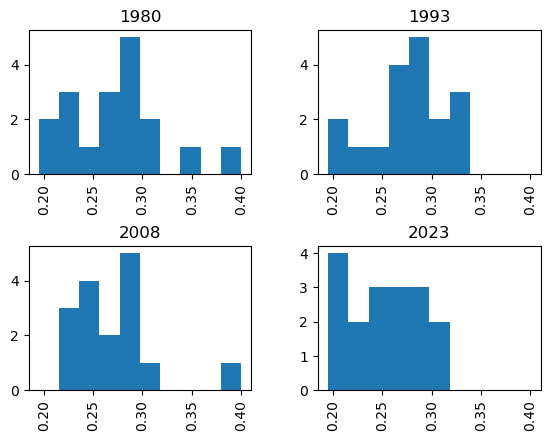

In [10]:
phillies['Batting_Average'].hist(by=phillies['Year'], bins=10, range=[.195, .400])

array([[<Axes: title={'center': '1980'}>,
        <Axes: title={'center': '1993'}>],
       [<Axes: title={'center': '2008'}>,
        <Axes: title={'center': '2023'}>]], dtype=object)

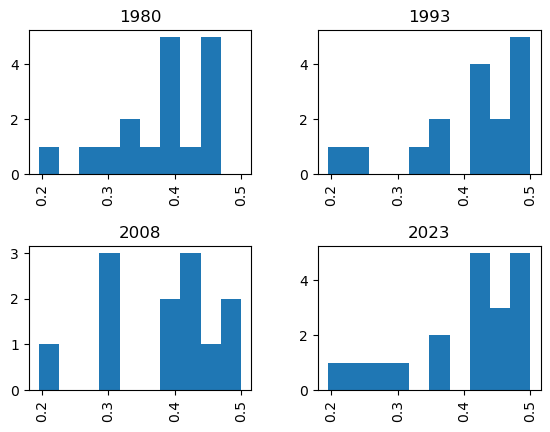

In [7]:
phillies['Slugging_Percentage'].hist(by=phillies['Year'], bins=10, range=[.195, .500])